In [ ]:
import pandas as pd
import geopandas as gpd
from collections import defaultdict
import matplotlib
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime

In [ ]:
ASP_data = pd.read_csv("processed_data_AsiaPacific.csv")
USA_data = pd.read_csv("processed_data_USA.csv")
WE_data = pd.read_csv("processed_data_Europe.csv")
SAS_data = pd.read_csv("processed_data_Asia.csv")
AF_data = pd.read_csv("processed_data_Africa.csv")
MENA_data = pd.read_csv("processed_data_MENA.csv")

In [ ]:
USA_data.head()

,Unnamed: 0,text,created_at,like_count,retweet_count,reply_count,geo_place_id,country_code,country,name,full_name,cleaned_tweet,geo_coordinate,TextBlob_polarity,TextBlob_subjectivity,nltk_sentiment_compound_score,nltk_sentiment_category
0,0,@ABCPolitics @ABCNewsLive Praying that diploma...,2021-12-31T23:52:41.000Z,0,0,1,60e2c37980197297,US,United States,St Paul,"St Paul, MN",praying that diplomacy somehow works pandemic ...,"[-93.207783, 44.8907521]",0.15,0.40000,0.6597,positive
1,1,And then...you have the cost of disposal of th...,2021-12-31T18:12:40.000Z,0,0,0,60e2c37980197297,US,United States,St Paul,"St Paul, MN",then you have cost disposal fossil fuel statio...,"[-93.207783, 44.8907521]",0.00,0.00000,0.0000,neutral
2,2,@MaryHeglar Someone should do a remake of that...,2021-12-31T23:29:48.000Z,1,0,0,4f512d0c98bf2004,US,United States,Rehoboth Beach,"Rehoboth Beach, DE",someone should do remake that xmas carol updat...,"[-75.0933473, 38.7050352]",0.00,0.00000,0.0000,neutral
3,3,My best to all across our globe\nMay 2022 brin...,2021-12-31T23:24:41.000Z,0,0,0,ac88a4f17a51c7fc,US,United States,Portland,"Portland, OR",my best all across our globe may 2022 bring li...,"[-122.7900653, 45.421863]",0.35,0.39375,0.9270,positive
4,4,@RabbitTrails It doesn't matter. A downed powe...,2021-12-31T16:27:14.000Z,1,0,3,ac88a4f17a51c7fc,US,United States,Portland,"Portland, OR",it doesnt matter downed powerline could not ca...,"[-122.7900653, 45.421863]",0.10,0.10000,-0.5063,negative


# WordCloud Visualization

In [ ]:
# generate wordcloud
def cloud(data,str_data):
    text = " ".join(review for review in data['cleaned_tweet'].astype(str))
    stopwords = set(STOPWORDS)
    stopwords.update(["will", "maybe", "thank", "people","something", "one", "u", "want", "may", "us", "many",
                 "know", "help", "tell", "need", "don", "t", 'good', 'imam', 'time', 'S', 'say', 'bad', 'dont',
                 'now', 'thing', 'go', 'let', 'anything', 'things', 'think', 'seem', 'via', 'ye', 'really',
                  'real', 'even', 'going', 'make','doesn', 'said', 'must'])
    wordcloud = WordCloud(stopwords=stopwords,  colormap='RdYlGn',background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(str_data)
    plt.show()

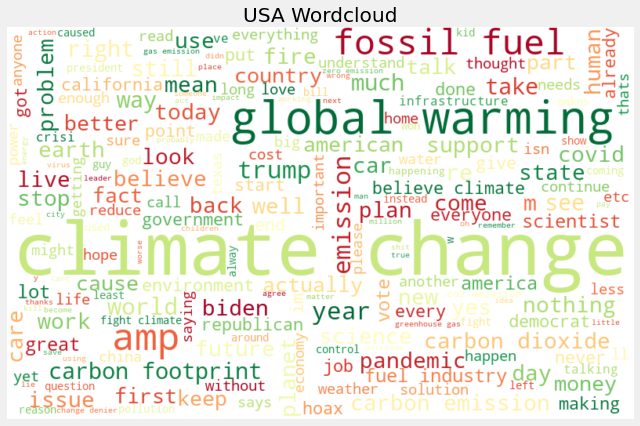

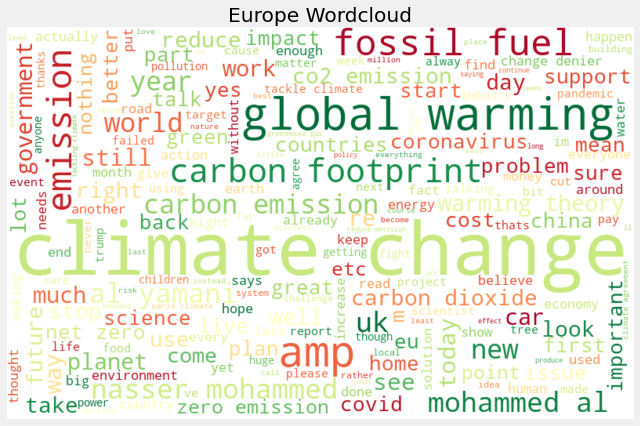

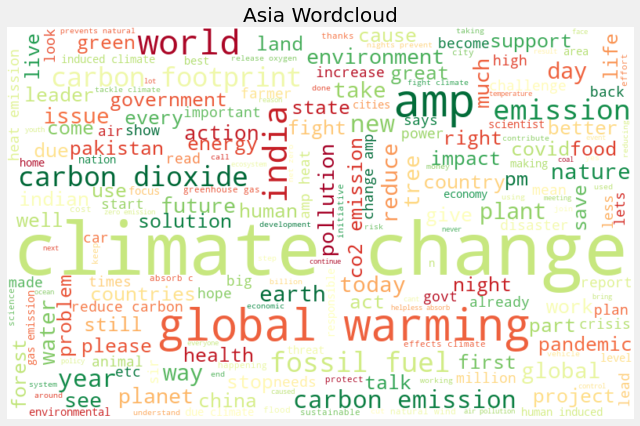

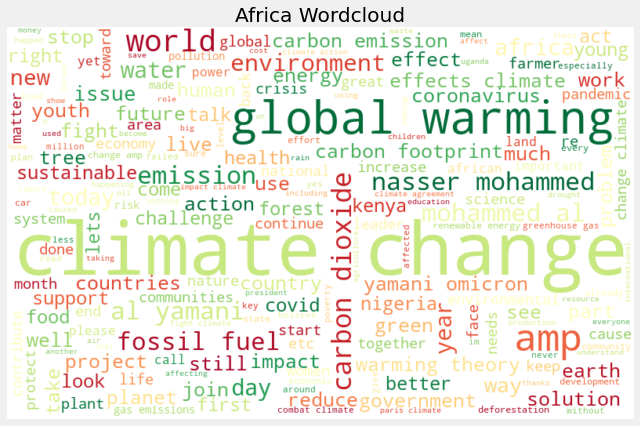

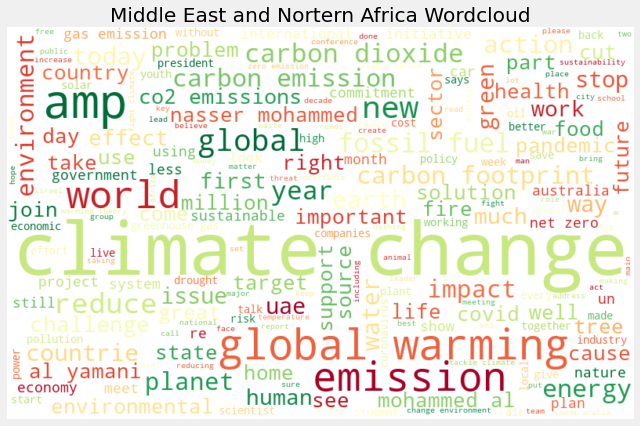

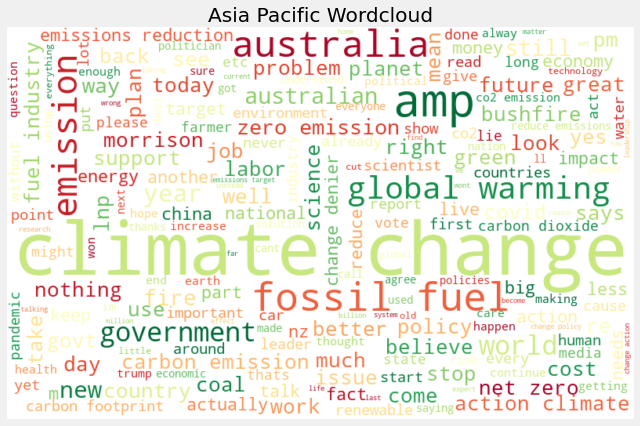

In [ ]:
# get word cloud of each region
data_lis = [USA_data,WE_data,SAS_data,AF_data,MENA_data,ASP_data]
data_str_lis = ["USA Wordcloud","Europe Wordcloud","Asia Wordcloud",
                "Africa Wordcloud","Middle East and Nortern Africa Wordcloud","Asia Pacific Wordcloud"]
for i in range(len(data_lis)):
    cloud(data_lis[i],data_str_lis[i])

Explanation and discovery: In word clouds, the more frequent the words, the larger the words will be shown. From all six word clouds, we can see that the most common words are "climate change", "global warming" and "Fossil Fuels" because in this project we focus on tweets related to climate change. We notice that "amp", meaning to emphasize or hype something up, is showing up in all six graphs as well, which shows people from all regions are concerned about climate change. There are also some diference between regions. For example, in USA, the wordcloud connects more to the government. We notice that words like "trump", "biden", "republican", "vote", etc., appear in the graph, showing that people associate climate change in part to the government. 

# Pie Chart Comparing Polarity between Regions

In [ ]:
# get count and percentage of each positive, negative and neutral tweets
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    result = pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
    return result.drop(columns = ['Total'])


In [ ]:
# generate pie chart on sentiment test
def piechart(df, title):
    pichart = count_values_in_column(df,'nltk_sentiment_category')
    names= pichart.index
    sizes =pichart['Percentage']
    explode = (0.1, 0.1, 0)  
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=names, autopct='%1.1f%%',
        shadow=True, startangle=90)
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  
    plt.tight_layout()
    plt.title(title + ' Sentiment Analysis')
    plt.show()

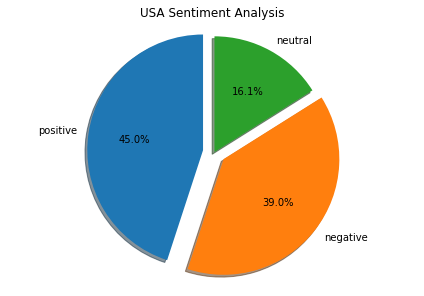

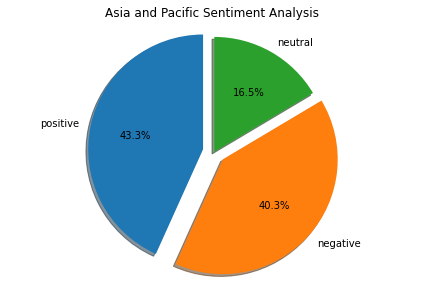

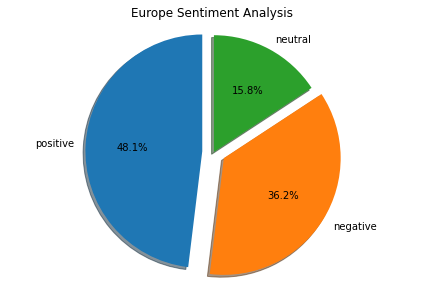

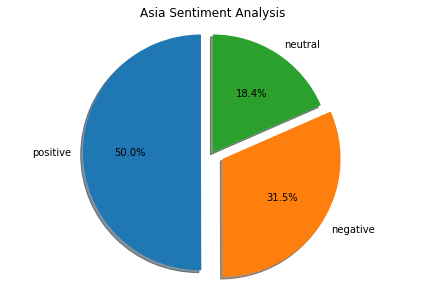

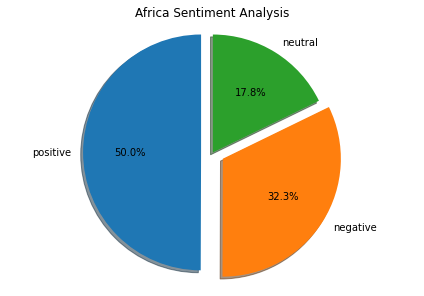

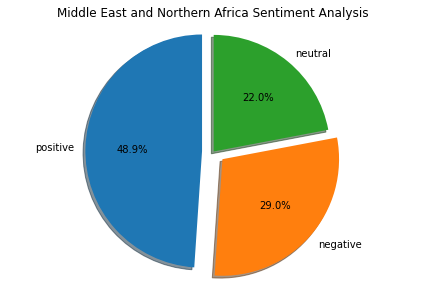

In [ ]:
# pie chart for different regions
piechart(USA_data, 'USA')
piechart(ASP_data,'Asia and Pacific')
piechart(WE_data, 'Europe')
piechart(SAS_data,'Asia')
piechart(AF_data, 'Africa')
piechart(MENA_data, 'Middle East and Northern Africa')

Explanation and discovery: Pie charts can visualize each category of sentiment clearly. There are three sentiment categories we explored in these pie charts: positive, negative and neutral. For all six pie charts, 'positive' composed the most part of the chart, which means that people are awared of the climate change. We will combine all graphs together in the next visualization to compare sentiment in different regions.

# Bar Chart Comparing the Sentiment Category Between Different Regions

In [ ]:
# combine all regions with percentage on category tweets
usa = count_values_in_column(USA_data,'nltk_sentiment_category').T
usa.index = ['USA']
asp = count_values_in_column(ASP_data,'nltk_sentiment_category').T
asp.index = ['Asian Pacific']
we = count_values_in_column(WE_data,'nltk_sentiment_category').T
we.index = ['Europe']
sas = count_values_in_column(SAS_data,'nltk_sentiment_category').T
sas.index =['Asia']
af = count_values_in_column(AF_data,'nltk_sentiment_category').T 
af.index = ['Africa']
mena = count_values_in_column(MENA_data,'nltk_sentiment_category').T
mena.index =['Middle East and Northern Africa']
combined_polarity = pd.concat([usa,asp,we,sas,af,mena])

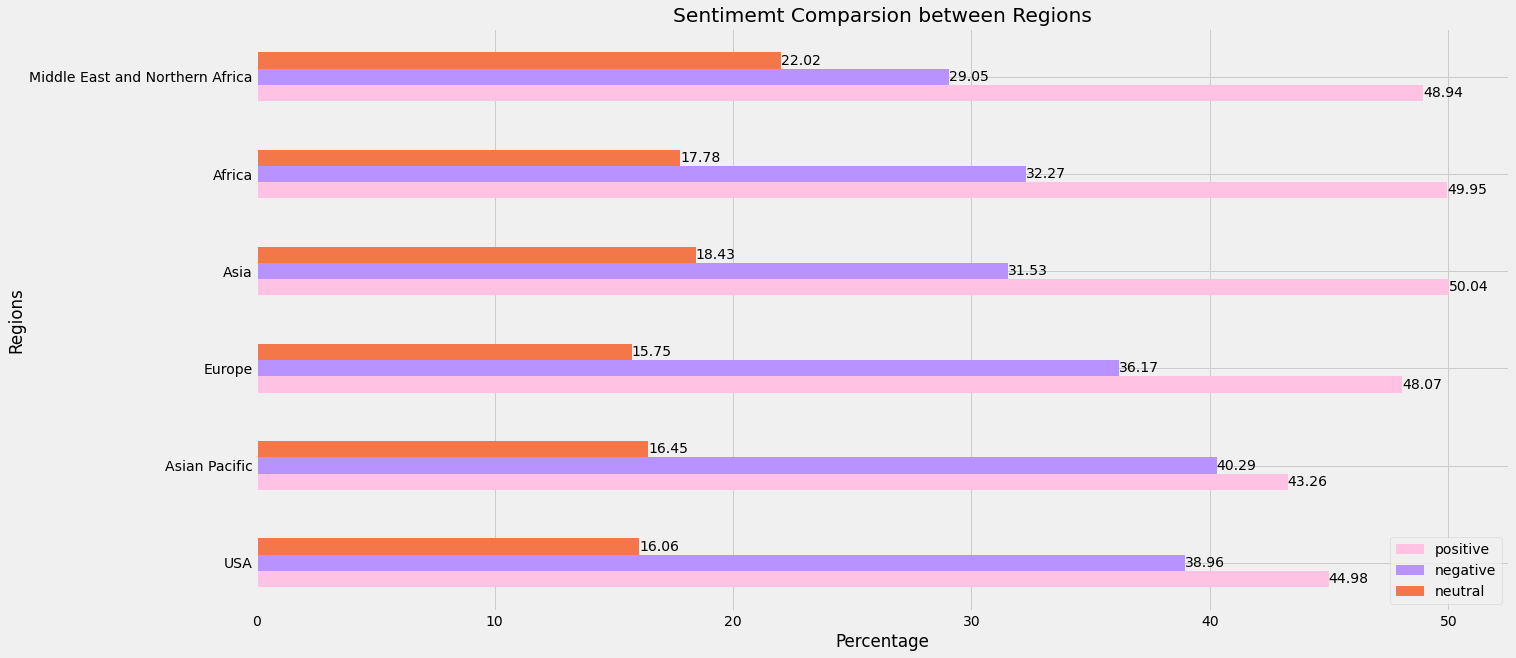

In [ ]:
# bar chart comparing polarity based on regions
matplotlib.style.use('fivethirtyeight') 
ax = combined_polarity.plot(kind="barh", figsize=(20,10), color = ['#FFC2E2', '#B892FF', '#F37748'])
plt.title("Sentimemt Comparsion between Regions")
plt.xlabel("Percentage")
plt.ylabel("Regions")
for container in ax.containers:
    ax.bar_label(container)

Explanation and Discovery: By combining sentiment categories from all six regions, we will have a closer look into the difference. In the Middle East, Africa and Asia, the positive emotion towards climate change is much higher than other regions. As we known, Asia is one of the regions that is impacted by the climate change. For example, we heard the News of floods in Pakistan. We will take a closer look into the sentiment by dates people posting tweets in USA and connect it to news. 

# USA Tweets Counts Visualization by Dates

In [ ]:
#loading USA dataset for analysis
USA_data = pd.read_csv("processed_data_USA.csv")

In [ ]:
#changing the date data in the dataframe to datetime format
USA_data['created_at'] = pd.to_datetime(USA_data['created_at'], format="%Y-%m-%dT%H:%M:%S")

In [ ]:
#grabbing just the date info and putting it into a new column without time info
USA_data['created_at_date'] = pd.to_datetime(USA_data['created_at']).dt.date

In [ ]:
#grouping the data wrt date so that we can plot 
df = USA_data.groupby([(USA_data.created_at.dt.year), (USA_data.created_at.dt.month), (USA_data.created_at.dt.day)]).count()

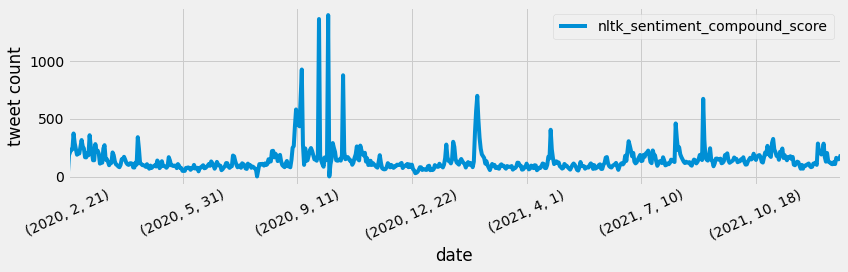

In [ ]:
#plotting the data groupd by date
df['ind'] = df.index.to_numpy()
ax = df.interpolate().plot(x='ind', y='nltk_sentiment_compound_score', figsize=(12, 4), rot=25)
ax.set_xlabel('date')
ax.set_ylabel('tweet count')
ax.autoscale(enable=True, axis='x', tight=True) 
plt.tight_layout()
plt.show()

# USA Tweets Sentiment Visualization by Dates

In [ ]:
#loading USA dataset for analysis
USA_data = pd.read_csv("processed_data_USA.csv")

In [ ]:
#changing the date data in the dataframe to datetime format
USA_data['created_at'] = pd.to_datetime(USA_data['created_at'], format="%Y-%m-%dT%H:%M:%S")

In [ ]:
#grabbing just the date info and putting it into a new column without time info
USA_data['created_at_date'] = pd.to_datetime(USA_data['created_at']).dt.date

In [ ]:
#grouping the data wrt date so that we can plot 
df = USA_data.groupby([(USA_data.created_at.dt.year), (USA_data.created_at.dt.month), (USA_data.created_at.dt.day)]).sum()


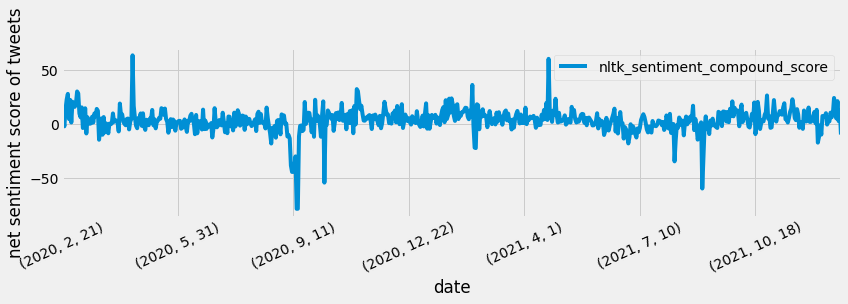

In [ ]:
#plotting the data groupd by date
df['ind'] = df.index.to_numpy()
ax = df.interpolate().plot(x='ind', y='nltk_sentiment_compound_score', figsize=(12, 4), rot=25)
ax.set_xlabel('date')
ax.set_ylabel('net sentiment score of tweets')
ax.autoscale(enable=True, axis='x', tight=True) 
plt.tight_layout()
plt.show()

# Sentiment Heat Map in USA

In [ ]:
shape_path = 'cb_2018_us_state_500k.shp'
shape = gpd.read_file(shape_path)

In [ ]:
#load the dictionary to convert abbreviations to full state names
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

#calculate the counts per state
state_ratio = defaultdict(int)

for s in USA_data['full_name']:
    s_list = s.split(', ')
    if len(s_list) != 2:
        pass
    else:
        if s_list[1] == 'USA':
            if s_list[0] not in states.keys():
                pass
            else:
                state_ratio[s_list[0]] += 1 
        elif s_list[1] == 'Queens':
            state_ratio['New York'] += 1
        elif s_list[1] not in states.keys():
            pass
        else:
            state_ratio[states[s_list[1]]] += 1
  


In [ ]:
del state_ratio['District of Columbia']

In [ ]:
len(state_ratio)

50

In [ ]:
#calculate the ratios of polarity score and sentiment score for each state
polarity_ratio = defaultdict(int)
sentiment_ratio = defaultdict(int)
for index, row in USA_data.iterrows():
    s_list = row['full_name'].split(', ')
    if len(s_list) != 2:
        pass
    else:
        if s_list[1] == 'USA':
            if s_list[0] not in states.keys():
                pass
            else:
                polarity_ratio[s_list[0]] +=  row['TextBlob_polarity'] / state_ratio[states[s_list[0]]]
                sentiment_ratio[s_list[0]] +=  row['nltk_sentiment_compound_score'] / state_ratio[states[s_list[0]]]
        elif s_list[1] == 'Queens':
            polarity_ratio['New York'] += row['TextBlob_polarity'] / state_ratio['New York']
            sentiment_ratio['New York'] += row['nltk_sentiment_compound_score'] / state_ratio['New York']
        elif s_list[1] not in states.keys():
            pass
        elif state_ratio[states[s_list[1]]] == 0:
            pass
        else:
            polarity_ratio[states[s_list[1]]] += row['TextBlob_polarity'] / state_ratio[states[s_list[1]]]
            sentiment_ratio[states[s_list[1]]] += row['nltk_sentiment_compound_score'] / state_ratio[states[s_list[1]]]

In [ ]:
#normalizaiton for polarity scores
interval_polarity = max(list(polarity_ratio.values())) - min(list(polarity_ratio.values()))
min_p = min(list(polarity_ratio.values()))

In [ ]:
for s in polarity_ratio:
    polarity_ratio[s] = (polarity_ratio[s] - min_p) / interval_polarity
  

In [ ]:
#normalization for sentiment scores
interval_sentiment = max(list(sentiment_ratio.values())) - min(list(sentiment_ratio.values()))
min_s = min(list(sentiment_ratio.values()))

In [ ]:
for s in sentiment_ratio:
    sentiment_ratio[s] = (sentiment_ratio[s] - min_s) / interval_sentiment

In [ ]:
USA_Population = pd.read_csv("USA_Population.csv")
USA_Population
pop_dic = dict(zip(USA_Population['state'], USA_Population['pop2022']))

In [ ]:
#normalize the counts ratios for each state
counts_ratio = state_ratio.copy()
for s in state_ratio:
    if s in pop_dic.keys():
        counts_ratio[s] = state_ratio[s] / pop_dic[s]
    else:
        NA = s
        continue

In [ ]:
interval = max(list(counts_ratio.values())) - min(list(counts_ratio.values()))
min_v = min(list(counts_ratio.values()))

In [ ]:
for s in counts_ratio:
    counts_ratio[s] = (counts_ratio[s] - min_v) / interval

In [ ]:
len(state_ratio)

50

In [ ]:
#create a new Dataframe to merge into one file
df = pd.DataFrame()
df['State'] = state_ratio.keys()
df['Counts'] = state_ratio.values()
df['polarity'] = polarity_ratio.values()
df['sentiment'] = sentiment_ratio.values()
df['Ratio'] = counts_ratio.values()

In [ ]:
shape = pd.merge(
    left=shape,
    right=df,
    left_on='NAME',
    right_on='State',
    how='left'
)

#shape = shape.dropna()
# take a close look at us mainland
shape = shape[~shape['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

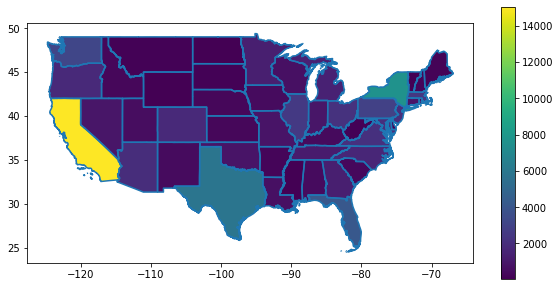

In [ ]:
# count heat map
ax = shape.boundary.plot(figsize=(10, 5))
shape.plot(ax=ax, column='Counts', legend=True)
plt.show()

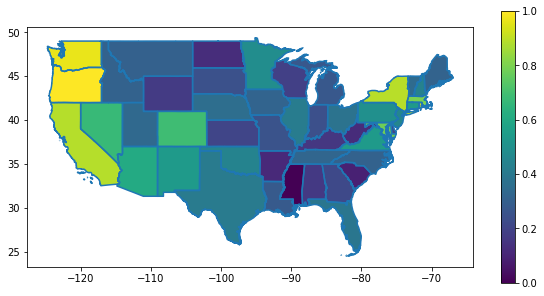

In [ ]:
# normalized count heat map
ax = shape.boundary.plot(figsize=(10, 5))
shape.plot(ax=ax, column='Ratio', legend=True)
plt.show()

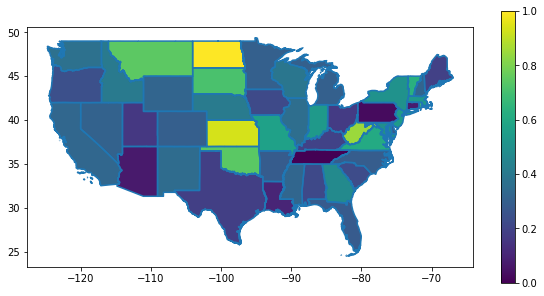

In [ ]:
# textblob model
ax = shape.boundary.plot(figsize=(10, 5))
shape.plot(ax=ax, column='polarity', legend=True)
plt.show()

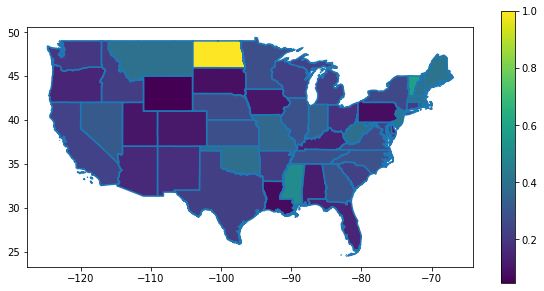

In [ ]:
# vadar model
ax = shape.boundary.plot(figsize=(10, 5))
shape.plot(ax=ax, column='sentiment', legend=True)
plt.show()